In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
url = 'https://www.cia.gov/the-world-factbook/countries/armenia/'

In [21]:
headers = {"Accept-Language": 'en-US,en;q=0.9','User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36 Edg/87.0.664.47'}

In [22]:
try:
    response = requests.get(url,headers=headers)
    response.raise_for_status()
except requests.exceptions.HTTPError as e:
    print(e)

In [23]:
soup = BeautifulSoup(response.text)

In [26]:
population = soup.select_one('div#people-and-society p').getText()
population


'3,011,609 (July 2021 est.)'

In [33]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time

In [48]:
driver_path = "C:\Development\chromedriver.exe"
url = 'https://www.cia.gov/the-world-factbook/countries/'
driver = webdriver.Chrome(driver_path)
driver.get(url)


import re
#for _ in range(5):
elements = driver.find_elements_by_css_selector('a.inline-link')
for element in elements:
    print(element.text,end=' ')
    url = element.get_attribute('href')
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    population = soup.select_one('div#people-and-society p').getText()
    print(population)
    #element.click()
    #time.sleep(3)
    #driver.back()
    #time.sleep(10)

    #next_button = driver.find_element_by_xpath('/html/body/div/div[1]/div[2]/main/section/div/div/div[2]/div[2]/div/div/span[3]')
    #next_button.click()
    #time.sleep(3)

Afghanistan 37,466,414 (July 2021 est.)
Akrotiri approximately 18,195 on the Sovereign Base Areas of Akrotiri and Dhekelia including 11,000 Cypriots and 7,195 Service and UK-based contract personnel and dependents (2020)
Albania 3,088,385 (July 2021 est.)
Algeria 43,576,691 (July 2021 est.)
American Samoa 46,366 (July 2021 est.)
Andorra 85,645 (July 2021 est.)
Angola 33,642,646 (July 2021 est.)
Anguilla 18,403 (July 2021 est.)
Antarctica no indigenous inhabitants, but there are both permanent and summer-only staffed research stations note: 53 countries have signed the 1959 Antarctic Treaty; 30 of those operate through their National Antarctic Program a number of seasonal-only (summer) and year-round research stations on the continent and its nearby islands south of 60 degrees south latitude (the region covered by the Antarctic Treaty); the population engaging in and supporting science or managing and protecting the Antarctic region varies from approximately 4,400 in summer to 1,100 in 

In [35]:
import iso3166

In [37]:
iso3166.countries.get('Bahamas')

Country(name='Bahamas', alpha2='BS', alpha3='BHS', numeric='044', apolitical_name='Bahamas')

In [49]:
url = 'https://www.un.org/en/member-states/'

In [50]:
try:
    response = requests.get(url)
    response.raise_for_status()
except requests.exceptions.HTTPError as e:
    print(e)

In [51]:
soup = BeautifulSoup(response.text)

In [55]:
states = soup.select('span.member-state-name')

In [58]:
member_states = []

In [59]:
for state in states:
    member_states.append(state.getText())

In [61]:
pd.Series(member_states)

0                            Afghanistan
1                                Albania
2                                Algeria
3                                Andorra
4                                 Angola
                     ...                
188    Venezuela, Bolivarian Republic of
189                             Viet Nam
190                                Yemen
191                               Zambia
192                             Zimbabwe
Length: 193, dtype: object

In [62]:
state_containers = soup.find_all(class_="member-state")


In [63]:
len(state_containers)

193

In [71]:
data = []

In [72]:
for state_container in state_containers:
    state_name = state_container.select_one('span.member-state-name').getText()
    join_date = state_container.select_one('span.date-display-single').getText()
    data.append([state_name,join_date])

In [75]:
df = pd.DataFrame(data,columns=['Name','Join_Date'])

In [76]:
df

,Name,Join_Date
0,Afghanistan,19-11-46
1,Albania,14-12-55
2,Algeria,08-10-62
3,Andorra,28-07-93
4,Angola,01-12-76
...,...,...
188,"Venezuela, Bolivarian Republic of",15-11-45
189,Viet Nam,20-09-77
190,Yemen,30-09-47
191,Zambia,01-12-64


In [85]:
pd.to_datetime(df.Join_Date,format="%d-%m-%y",infer_datetime_format=True)

0     2046-11-19
1     2055-12-14
2     2062-10-08
3     1993-07-28
4     1976-12-01
         ...    
188   2045-11-15
189   1977-09-20
190   2047-09-30
191   2064-12-01
192   1980-08-25
Name: Join_Date, Length: 193, dtype: datetime64[ns]

In [90]:
df[df.Join_Date.dt.year > 2015].min()

Name                 Afghanistan
Join_Date    2045-10-24 00:00:00
dtype: object

In [92]:
df[df.Name == 'Afghanistan']

,Name,Join_Date
0,Afghanistan,2046-11-19


In [104]:
x = pd.Timestamp("May 20 2046")

In [106]:
x.replace(year=x.year -100)

Timestamp('1946-05-20 00:00:00')

In [108]:
df.Join_Date.dt.year.value_counts().sort_index(ascending=False)

2068     3
2066     4
2065     3
2064     3
2063     2
2062     6
2061     4
2060    17
2058     1
2057     2
2056     4
2055    16
2050     1
2049     1
2048     1
2047     2
2046     4
2045    49
2011     1
2006     1
2002     2
2000     2
1999     3
1994     1
1993     6
1992    13
1991     7
1990     2
1984     1
1983     1
1981     3
1980     2
1979     1
1978     2
1977     2
1976     3
1975     6
1974     3
1973     2
1971     5
1970     1
Name: Join_Date, dtype: int64

In [110]:
df.loc[df.Join_Date.dt.year> 2020,'Join_Date'] = df.loc[df.Join_Date.dt.year > 2020,'Join_Date'].apply(lambda value: value.replace(value.year - 100))

In [111]:
df

,Name,Join_Date
0,Afghanistan,1946-11-19
1,Albania,1955-12-14
2,Algeria,1962-10-08
3,Andorra,1993-07-28
4,Angola,1976-12-01
...,...,...
188,"Venezuela, Bolivarian Republic of",1945-11-15
189,Viet Nam,1977-09-20
190,Yemen,1947-09-30
191,Zambia,1964-12-01


<AxesSubplot:xlabel='Join_Date'>

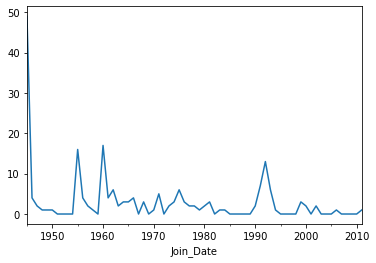

In [117]:
df.resample('Y',on='Join_Date',kind='period').size().plot()